In [98]:
import pandas as pd

In [99]:
df = pd.read_csv('dataset_darae.csv')
df.drop('입출차시각',axis =1,inplace= True)
df.drop('초',axis =1,inplace= True)
df.drop('Unnamed: 0',axis =1,inplace= True)

In [100]:

df.reset_index(inplace=True)


In [101]:
def parking(x):
    if x =='15동':
        return 15
    elif x == '14동':
        return 14
    elif x == '13동':
        return 13
    elif x == '12동':
        return 12
df['주차장'] = df['주차장'].apply(parking)

In [102]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor
from datetime import datetime
from sklearn.model_selection import train_test_split

In [103]:
train_data = df[df['일']<=20]
test_data = df[df['일']>20]

In [104]:
train_data

,index,연,월,일,시,분,공휴일,요일,주차장,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),잔류차량수,비율,혼잡도
0,12753,2022,9,1,7,0,0,3,15,20.2,0.0,0.9,94.0,0.0,1,0.004975,0
1,12754,2022,9,1,7,12,0,3,15,20.2,0.0,0.9,94.0,0.0,2,0.009950,0
2,12755,2022,9,1,7,15,0,3,15,20.2,0.0,0.9,94.0,0.0,3,0.014925,0
3,12756,2022,9,1,7,16,0,3,15,20.2,0.0,0.9,94.0,0.0,2,0.009950,0
4,12757,2022,9,1,7,20,0,3,15,20.2,0.0,0.9,94.0,0.0,3,0.014925,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,13561,2022,9,20,8,47,0,1,15,19.3,0.0,1.2,65.0,0.0,17,0.084577,0
809,13562,2022,9,20,8,51,0,1,15,19.3,0.0,1.2,65.0,0.0,18,0.089552,0
810,13563,2022,9,20,8,52,0,1,15,19.3,0.0,1.2,65.0,0.0,19,0.094527,0
811,13564,2022,9,20,8,52,0,1,15,19.3,0.0,1.2,65.0,0.0,20,0.099502,0


In [105]:
X_train , y_train = train_data.iloc[: , 0:14], train_data['비율']
X_test , y_test = test_data.iloc[: , 0:14], test_data['비율']


In [106]:
X_train

,index,연,월,일,시,분,공휴일,요일,주차장,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm)
0,12753,2022,9,1,7,0,0,3,15,20.2,0.0,0.9,94.0,0.0
1,12754,2022,9,1,7,12,0,3,15,20.2,0.0,0.9,94.0,0.0
2,12755,2022,9,1,7,15,0,3,15,20.2,0.0,0.9,94.0,0.0
3,12756,2022,9,1,7,16,0,3,15,20.2,0.0,0.9,94.0,0.0
4,12757,2022,9,1,7,20,0,3,15,20.2,0.0,0.9,94.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,13561,2022,9,20,8,47,0,1,15,19.3,0.0,1.2,65.0,0.0
809,13562,2022,9,20,8,51,0,1,15,19.3,0.0,1.2,65.0,0.0
810,13563,2022,9,20,8,52,0,1,15,19.3,0.0,1.2,65.0,0.0
811,13564,2022,9,20,8,52,0,1,15,19.3,0.0,1.2,65.0,0.0


In [107]:
model = LGBMRegressor()
model.fit(X_train, y_train, categorical_feature =['주차장'], verbose=100)

/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


LGBMRegressor()

In [108]:
y_predict = model.predict(X_test)
y_predict = pd.DataFrame(y_predict)

In [109]:
result = test_data.reset_index()
result = pd.concat([result,y_predict],axis =1 )
result

,level_0,index,연,월,일,시,분,공휴일,요일,주차장,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),잔류차량수,비율,혼잡도,0
0,813,13566,2022,9,21,7,4,0,2,15,14.0,0.0,1.3,89.0,0.0,1,0.004975,0,0.042473
1,814,13567,2022,9,21,7,21,0,2,15,14.0,0.0,1.3,89.0,0.0,2,0.009950,0,0.037305
2,815,13568,2022,9,21,7,29,0,2,15,14.0,0.0,1.3,89.0,0.0,3,0.014925,0,0.044218
3,816,13569,2022,9,21,7,31,0,2,15,14.0,0.0,1.3,89.0,0.0,4,0.019900,0,0.044218
4,817,13570,2022,9,21,7,31,0,2,15,14.0,0.0,1.3,89.0,0.0,5,0.024876,0,0.044218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,1486,14239,2022,9,30,9,2,0,4,15,14.3,0.0,0.4,95.0,0.0,72,0.358209,1,0.142632
674,1487,14240,2022,9,30,9,2,0,4,15,14.3,0.0,0.4,95.0,0.0,73,0.363184,1,0.142632
675,1488,14241,2022,9,30,9,3,0,4,15,14.3,0.0,0.4,95.0,0.0,74,0.368159,1,0.142632
676,1489,14242,2022,9,30,9,4,0,4,15,14.3,0.0,0.4,95.0,0.0,75,0.373134,1,0.142632


In [112]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import mean_absolute_error
def confusion(df):
    if df[0] <= 0.3 :
        return 0
    elif df[0] <= 0.5 :
        return 1
    elif df[0] <= 0.8 :
        return 2
    else :
        return 3

result['혼잡도예측']=result.apply(confusion,axis=1)
print(accuracy_score(result['혼잡도'], result['혼잡도예측']))
print(mean_absolute_error(result['비율'], result[0]))

0.6150442477876106
0.16834766724347758


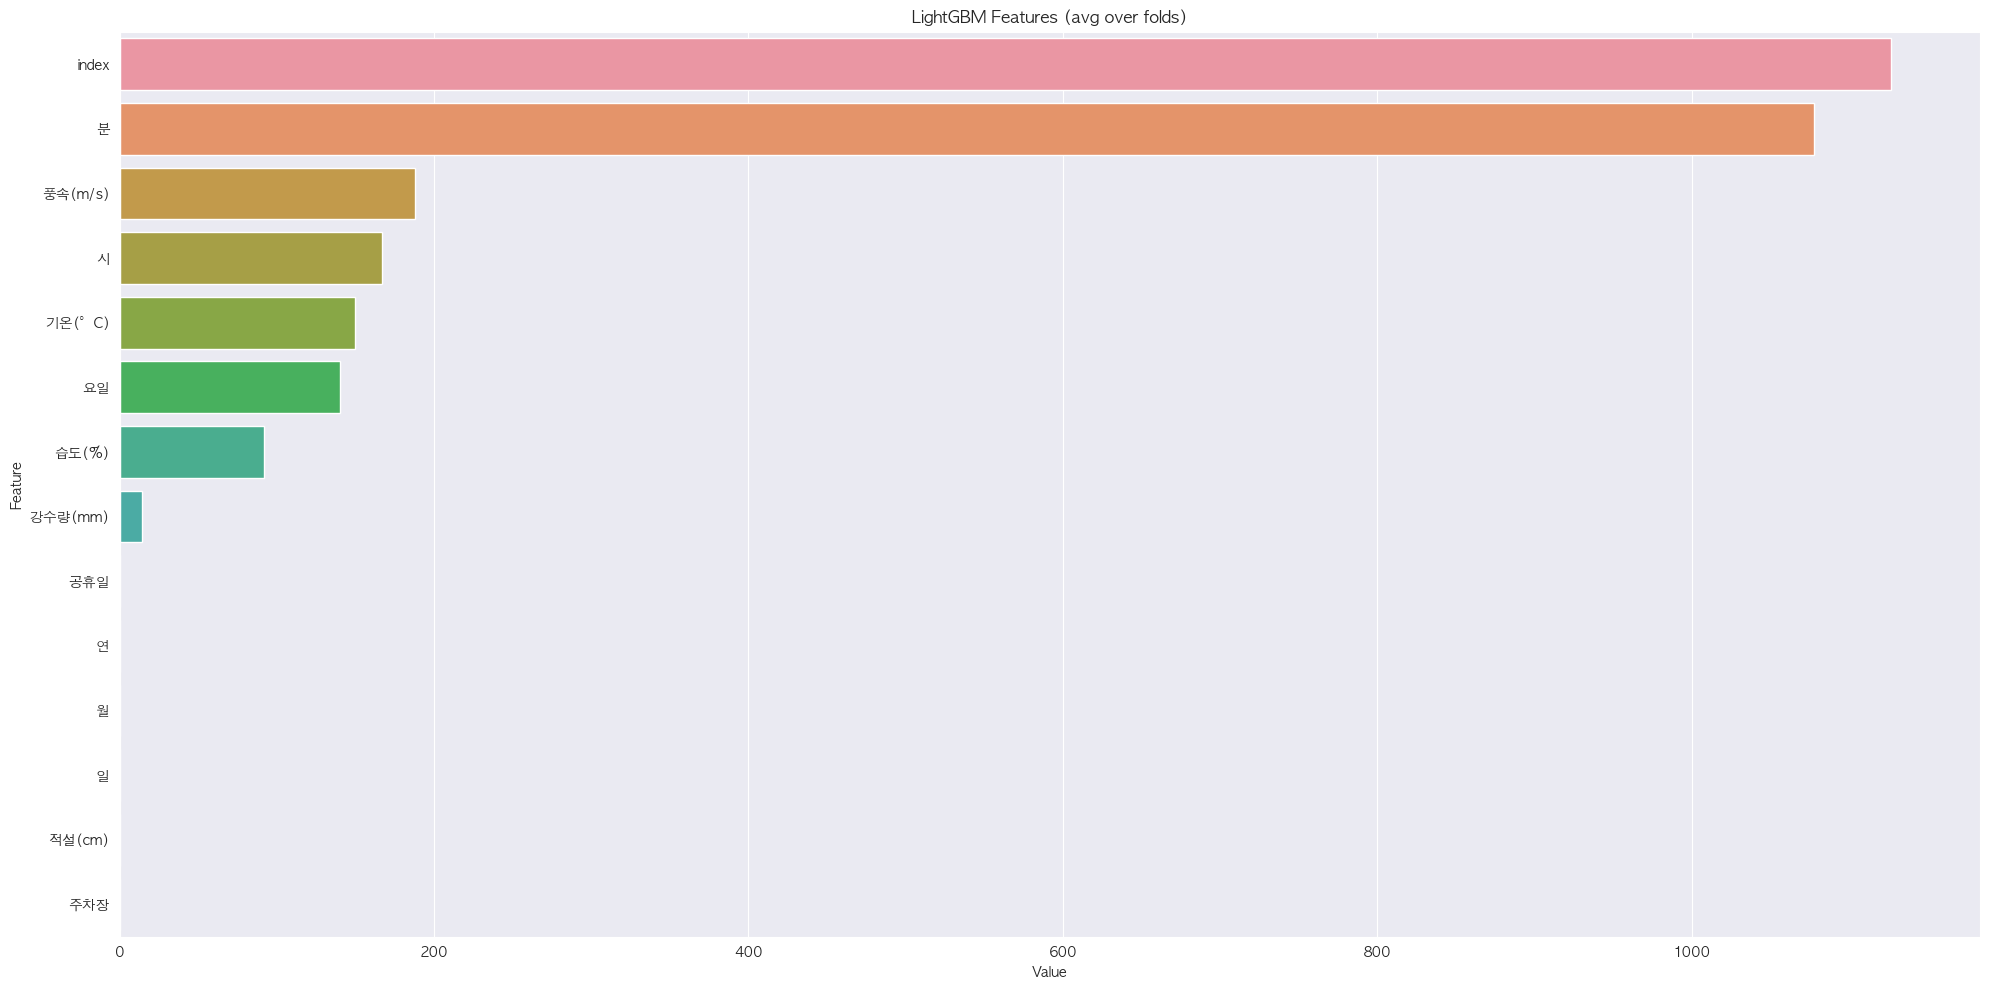

In [111]:
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()